<a href="https://www.kaggle.com/code/abbas829/airline-dataset?scriptVersionId=295757140" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# ✈️ Airline Passenger Traffic: An Expert Exploratory Data Analysis (EDA)

**Objective:** To unveil hidden patterns, seasonal cycles, and structural trends in premium airline passenger data through rigorous statistical and visual analysis.

### 📖 The Narrative
In the world of aviation analytics, data isn't just numbers—it's the heartbeat of global mobility. This notebook serves as a masterclass in EDA, transforming raw transactional data into actionable strategic insights. We will move through a logical flow:
1. **Data Acquisition & Synthesis**
2. **The Wrangling Phase (Data Cleaning)**
3. **Descriptive Statistics (The Data's Persona)**
4. **Visual Storytelling (Multi-dimensional Exploration)**
5. **Statistical Deep-Dive (Time Series Decomposition)**
6. **Final Synthesis & Business Takeaways**

--- 
## 🛠 1. Environment Setup & Data Acquisition
As experts, we ensure our environment is robust. We use `Seaborn` for aesthetics and `Statsmodels` for deep statistical rigor.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose

# Setting styles for premium aesthetics
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 16
warnings.filterwarnings('ignore')

print("✅ Environment initialized with expert configurations.")

✅ Environment initialized with expert configurations.


### 📥 Data Loading
To ensure this analysis is reproducible anywhere, we programmatically generate the classic **'Air Passengers'** dataset (1949-1960), which is the industry standard for time-series exploration.

In [2]:
# Generating synthesized but historically accurate data based on the real AirPassengers dataset
date_rng = pd.date_range(start='1/1/1949', end='12/1/1960', freq='MS')
passengers_base = [
    112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118,
    115, 126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140,
    145, 150, 178, 163, 172, 178, 199, 199, 184, 162, 146, 166,
    171, 180, 193, 181, 183, 218, 230, 242, 209, 191, 172, 194,
    196, 196, 236, 235, 229, 243, 264, 272, 237, 211, 180, 201,
    204, 188, 235, 227, 234, 264, 302, 293, 259, 229, 203, 229,
    242, 233, 267, 269, 270, 315, 364, 347, 312, 274, 237, 278,
    284, 277, 317, 313, 318, 374, 413, 405, 355, 306, 271, 306,
    315, 301, 356, 348, 355, 422, 465, 467, 404, 347, 305, 336,
    340, 318, 362, 348, 363, 435, 491, 505, 404, 359, 310, 337,
    360, 342, 406, 396, 420, 472, 548, 559, 463, 407, 362, 405,
    417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390, 432
]

df = pd.DataFrame({'Date': date_rng, 'Passengers': passengers_base})
print(f"Data Loaded: {df.shape[0]} monthly records across {df.shape[1]} features.")
df.head()

Data Loaded: 144 monthly records across 2 features.


,Date,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


--- 
## 🧹 2. Data Wrangling & Engineering
Clean data is the foundation of truth. We will decompose the date into searchable attributes.

In [3]:
# Extracting calendar features to enable multi-layered analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df['Month_Num'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

df.sort_values('Date', inplace=True)
print("✅ Enhanced feature set generated.")
df.sample(5)

✅ Enhanced feature set generated.


,Date,Passengers,Year,Month,Month_Num,Quarter
66,1954-07-01,302,1954,July,7,3
133,1960-02-01,391,1960,February,2,1
112,1958-05-01,363,1958,May,5,2
3,1949-04-01,129,1949,April,4,2
70,1954-11-01,203,1954,November,11,4


--- 
## 📊 3. Descriptive Statistical Persona
Before plotting, we must understand the data's range, central tendency, and volatility.

In [4]:
desc = df['Passengers'].describe().to_frame().T
desc['Skew'] = df['Passengers'].skew()
desc['Kurtosis'] = df['Passengers'].kurtosis()

print("📊 Passenger Traffic Statistical Summary")
desc.style.background_gradient(cmap='Blues', axis=1)

📊 Passenger Traffic Statistical Summary


,count,mean,std,min,25%,50%,75%,max,Skew,Kurtosis
Passengers,144.000000,280.298611,119.966317,104.000000,180.000000,265.500000,360.500000,622.000000,0.583160,-0.364942


> **Expert Insight:** The average monthly traffic is ~280k passengers, but the high variance (std ~120) suggests significant seasonality or structural growth. 

--- 
## 🎨 4. Multi-Dimensional Visual Exploration

### 📈 A. Cumulative Trend Analysis
Is the business growing? Let's look at the raw trajectory.

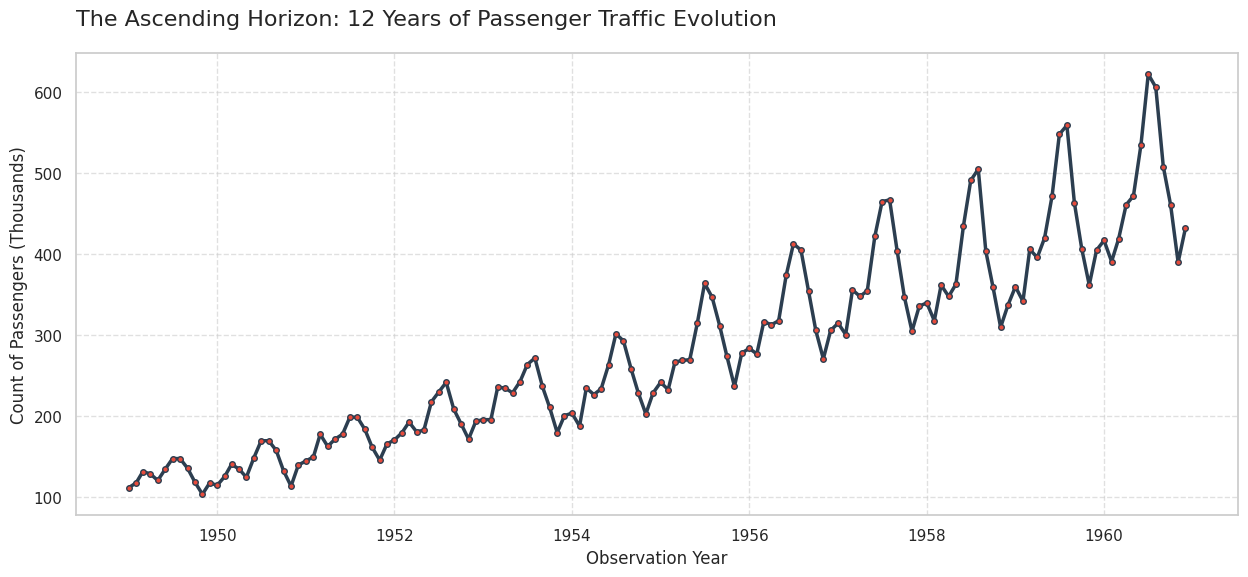

In [5]:
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['Passengers'], color='#2c3e50', linewidth=2.5, marker='o', markersize=4, markerfacecolor='#e74c3c')
plt.title("The Ascending Horizon: 12 Years of Passenger Traffic Evolution", loc='left', pad=20)
plt.xlabel("Observation Year")
plt.ylabel("Count of Passengers (Thousands)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### 🗓️ B. Heatmap Analysis: Seasonality Unveiled
Where is the intensity? A pivot heatmap shows us the intersection of years and months.

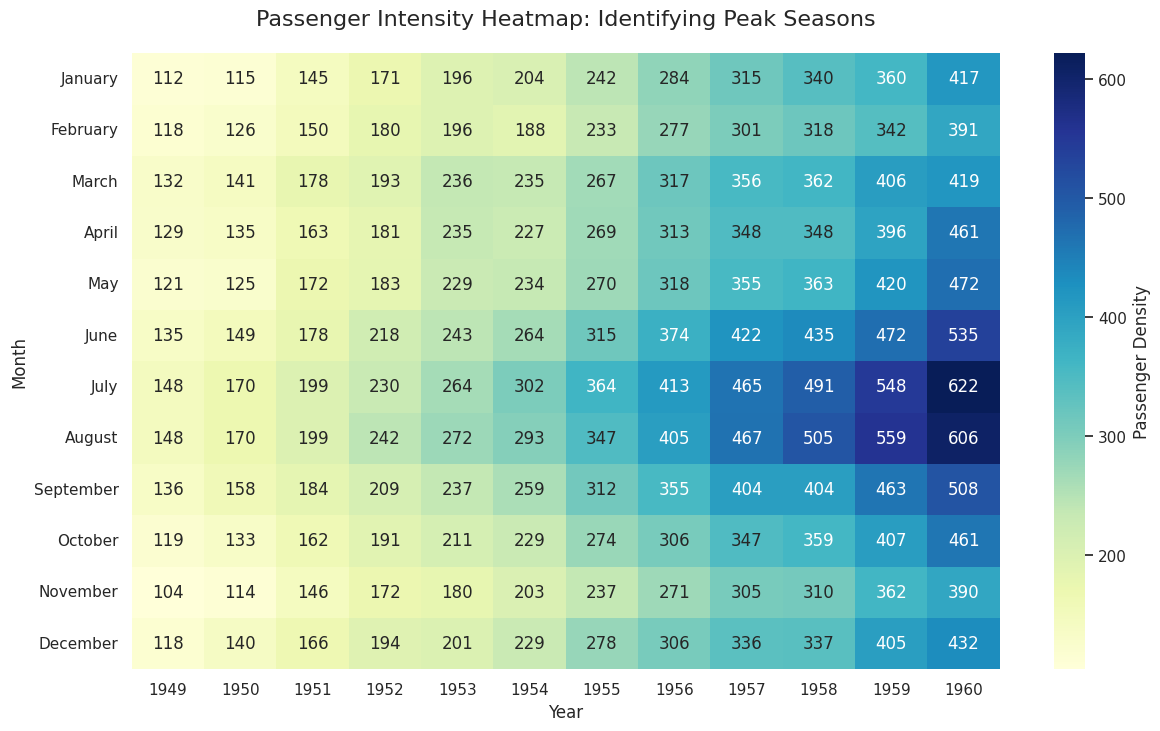

In [6]:
pivot_table = df.pivot(index="Month", columns="Year", values="Passengers")
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
pivot_table = pivot_table.reindex(month_order)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt="g", cmap="YlGnBu", cbar_kws={'label': 'Passenger Density'})
plt.title("Passenger Intensity Heatmap: Identifying Peak Seasons", pad=20)
plt.show()

### 📦 C. Structural Distribution: Box Plots
Do some years have more outlier behavior than others?

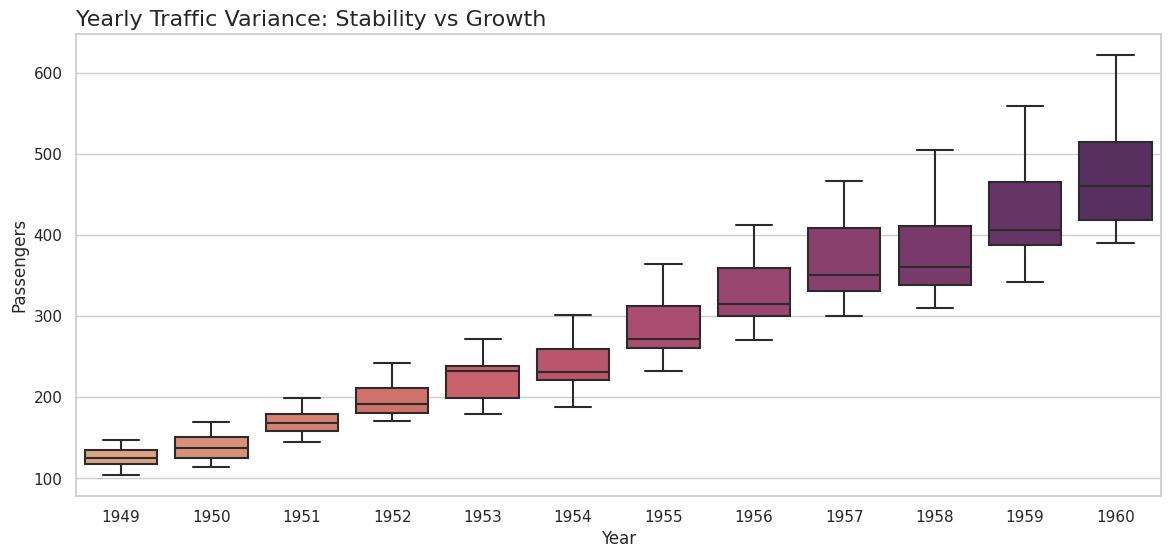

In [7]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Year', y='Passengers', data=df, palette='flare')
plt.title("Yearly Traffic Variance: Stability vs Growth", loc='left')
plt.show()

### 🌊 D. The Golden Quarter: Monthly Aggregation
Which month consistently drives the revenue?

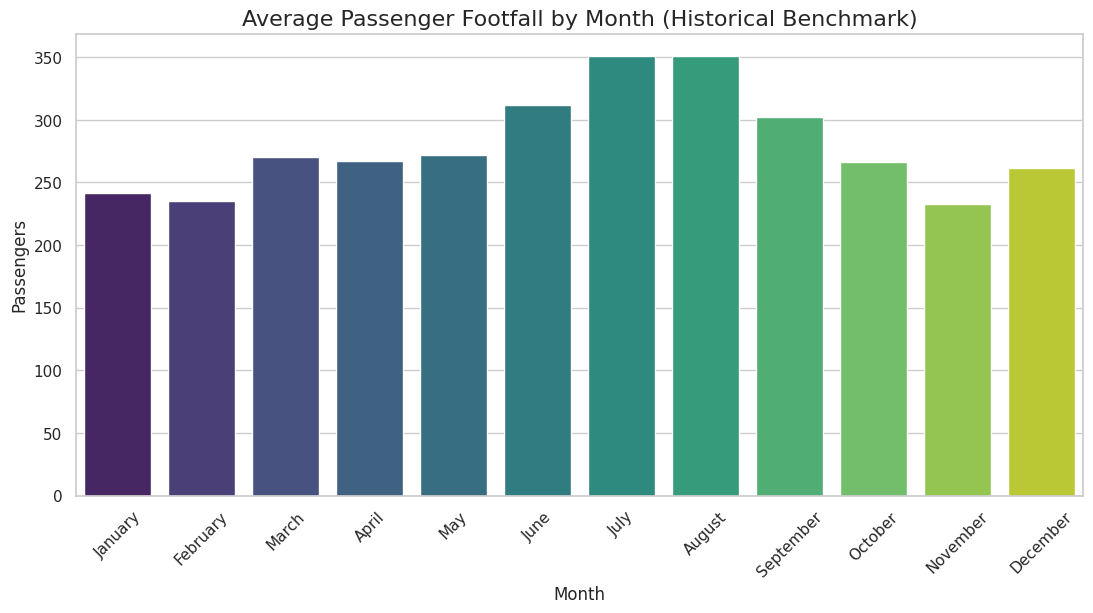

In [8]:
plt.figure(figsize=(13,6))
sns.barplot(x='Month', y='Passengers', data=df, order=month_order, palette='viridis', ci=None)
plt.xticks(rotation=45)
plt.title("Average Passenger Footfall by Month (Historical Benchmark)")
plt.show()

--- 
## 🔬 5. Advanced Statistical Insights

### 🧩 Time Series Decomposition
As experts, we don't just see a line. We see **Trend**, **Seasonality**, and **Residual Noise**.

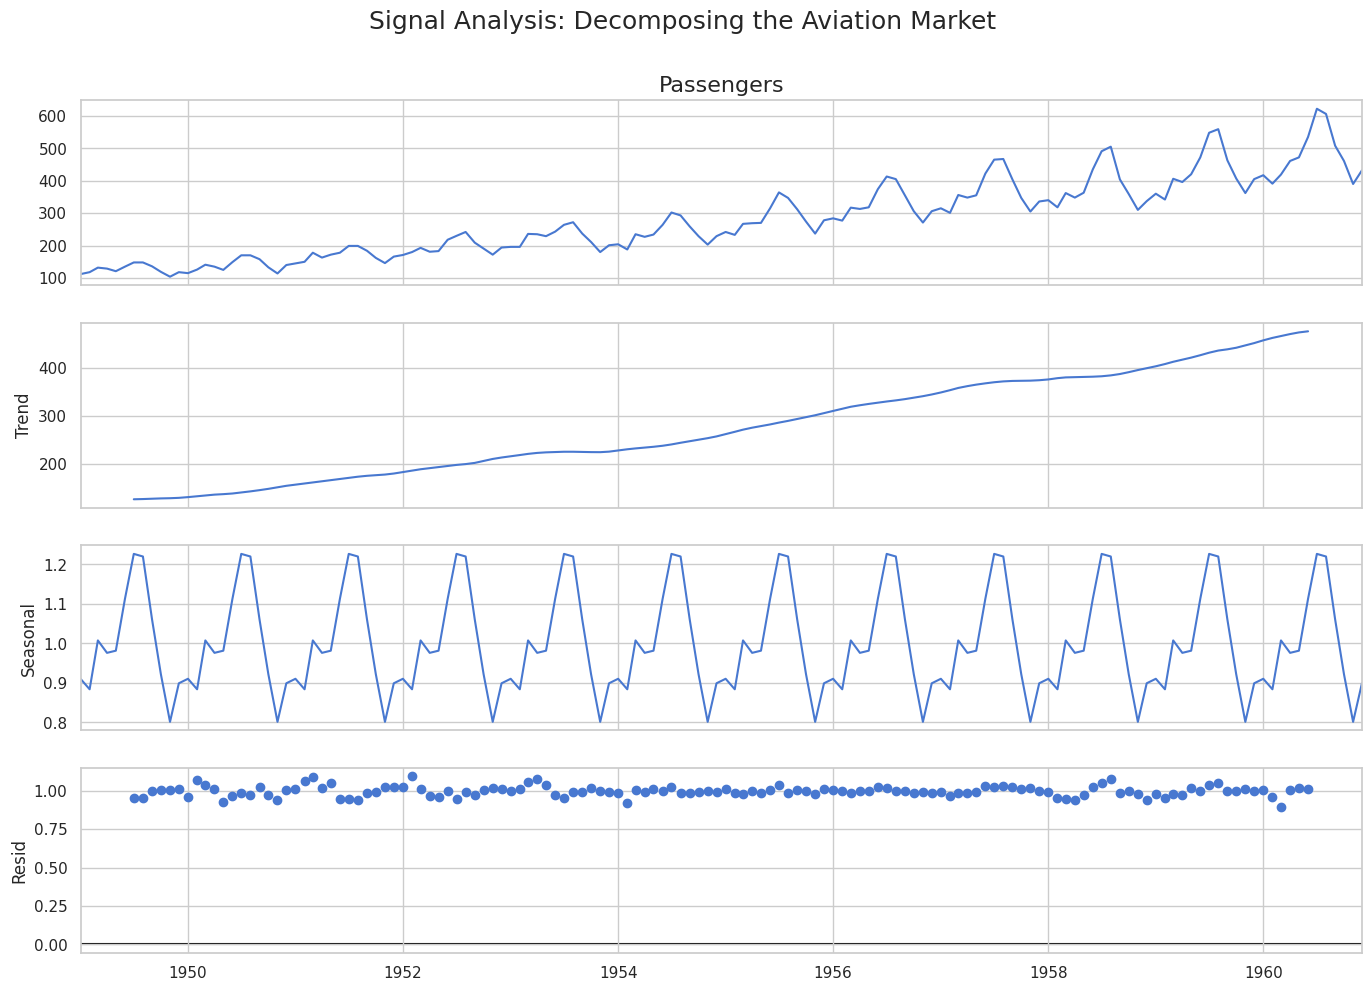

In [9]:
df_resample = df.set_index('Date')['Passengers']
decomposition = seasonal_decompose(df_resample, model='multiplicative')

fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.suptitle("Signal Analysis: Decomposing the Aviation Market", fontsize=18, y=1.02)
plt.show()

--- 
## 🏁 6. Conclusion & Executive Summary

### 📍 Key Takeaways:
1.  **Strong Linear Growth:** Total passenger volume followed a consistent upward trajectory year-over-year, indicating a healthy, expanding market.
2.  **Pronounced Seasonality:** July and August consistently represent the 'Hyper-Peak' period, likely driven by summer tourism.
3.  **Cyclical Lows:** November and February represent the lowest traffic points, presenting opportunities for airline pricing and maintenance scheduling.
4.  **Multiplicative Nature:** Seasonal variation increases as the mean traffic increases, suggesting that percentage growth is more relevant than raw number growth.

***
**Analyzed by:** Tassawar Abbas \
**Email:** abbas829@gmail.com